In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
root_folder = "/Users/alvaroleal/Desktop/DS/komorebi"

df_muestreos_parcela = pd.read_parquet(root_folder + '/muestreos_parcelas.parquet')

In [4]:
df_muestreos_parcela

,generated_muestreos,codparcela,provincia,municipio,fecha,campaña,poligono,parcela,recinto,subrecinto,...,402_sensor_climático_asociado,207_riego:_sistema_usual_de_riego,108_u_h_c_a_la_que_pertenece,316_fecha_de_plantación_variedad_secundaria,315_patrón_variedad_secundaria,317_%_superficie_ocupada_variedad_secundaria,306_altura_de_copa_(m),310_patrón_variedad_principal,411_representa_a_la_u_h_c_(si/no),109_sistema_para_el_cumplimiento_gestión_integrada
0,2020-04-23 14:30:39,023-00109-00-00,almeria,abla,2006-04-16,2006,23,109,0,0,...,AL006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-23 14:30:39,023-00109-00-00,almeria,abla,2006-04-27,2006,23,109,0,0,...,AL006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-23 14:30:39,023-00109-00-00,almeria,abla,2006-05-04,2006,23,109,0,0,...,AL006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-23 14:30:39,023-00109-00-00,almeria,abla,2006-05-11,2006,23,109,0,0,...,AL006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-23 14:30:39,023-00109-00-00,almeria,abla,2006-05-17,2006,23,109,0,0,...,AL006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581788,2021-04-05 17:26:06,008-00013-01-2,sevilla,villanueva de san juan,2021-03-02,2021,8,13,1,2,...,El Saucejo,NaN,LAS ATALAYAS,NaN,NaN,NaN,NaN,NaN,SI,Producción Integrada (PI)
581789,2021-04-05 17:26:06,008-00013-01-2,sevilla,villanueva de san juan,2021-03-09,2021,8,13,1,2,...,El Saucejo,NaN,LAS ATALAYAS,NaN,NaN,NaN,NaN,NaN,SI,Producción Integrada (PI)
581790,2021-04-05 17:26:06,008-00013-01-2,sevilla,villanueva de san juan,2021-03-16,2021,8,13,1,2,...,El Saucejo,NaN,LAS ATALAYAS,NaN,NaN,NaN,NaN,NaN,SI,Producción Integrada (PI)
581791,2021-04-05 17:26:06,008-00013-01-2,sevilla,villanueva de san juan,2021-03-23,2021,8,13,1,2,...,El Saucejo,NaN,LAS ATALAYAS,NaN,NaN,NaN,NaN,NaN,SI,Producción Integrada (PI)


In [5]:
df_muestreos_parcela.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581793 entries, 0 to 581792
Data columns (total 61 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   generated_muestreos                                 581793 non-null  datetime64[us]
 1   codparcela                                          581793 non-null  category      
 2   provincia                                           581793 non-null  string        
 3   municipio                                           581793 non-null  string        
 4   fecha                                               581793 non-null  datetime64[us]
 5   campaña                                             581793 non-null  uint16        
 6   poligono                                            581731 non-null  UInt16        
 7   parcela                                             581763 non-null  UInt16        
 8  

In [6]:
def deep_view(df):
    for columna in df.columns:
        print(f"Análisis de la columna: {columna}")

        if pd.api.types.is_numeric_dtype(df[columna]):
            print("Tipo: Numérica")
            print(f"Media: {df[columna].mean()}")
        else:
            print("Tipo: Categórica/Texto")

        print(f"Número total de valores: {df[columna].size}")
        print(f"Número de valores nulos: {df[columna].isnull().sum()}")

        valores_unicos = df[columna].value_counts()
        print(f"Número de valores únicos: {len(valores_unicos)}")

        print("\n" + "-"*50 + "\n")

deep_view(df_muestreos_parcela)

Análisis de la columna: generated_muestreos
Tipo: Categórica/Texto
Número total de valores: 581793
Número de valores nulos: 0
Número de valores únicos: 8

--------------------------------------------------

Análisis de la columna: codparcela
Tipo: Categórica/Texto
Número total de valores: 581793
Número de valores nulos: 0
Número de valores únicos: 5239

--------------------------------------------------

Análisis de la columna: provincia
Tipo: Categórica/Texto
Número total de valores: 581793
Número de valores nulos: 0
Número de valores únicos: 8

--------------------------------------------------

Análisis de la columna: municipio
Tipo: Categórica/Texto
Número total de valores: 581793
Número de valores nulos: 0
Número de valores únicos: 326

--------------------------------------------------

Análisis de la columna: fecha
Tipo: Categórica/Texto
Número total de valores: 581793
Número de valores nulos: 0
Número de valores únicos: 3252

--------------------------------------------------



## Distribution over time: Generated_muestreos vs Fecha

In [7]:
df_muestreos_parcela.groupby(df_muestreos_parcela['generated_muestreos']).size()

generated_muestreos
2020-04-23 14:30:39      2812
2020-04-23 14:31:50     14703
2020-04-23 14:34:36    112290
2020-04-23 14:39:25    105220
2020-04-23 14:42:09      6591
2020-04-23 16:54:05    125711
2020-04-23 17:00:15     53880
2021-04-05 17:26:06    160586
dtype: int64

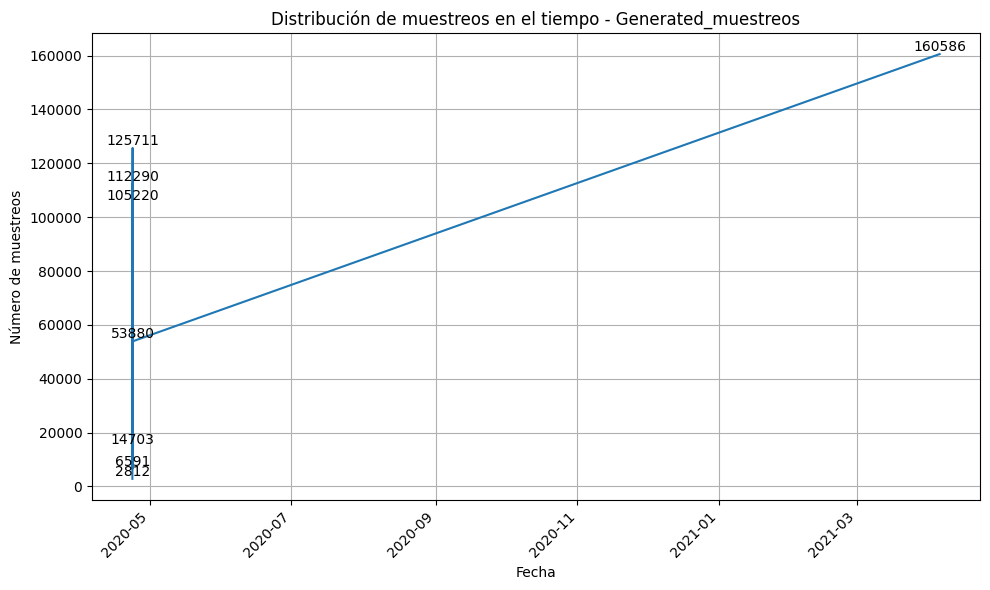

In [8]:
generated_muestreo_count = df_muestreos_parcela.groupby(df_muestreos_parcela['generated_muestreos']).size()
plt.figure(figsize=(10, 6))
generated_muestreo_count.plot(kind='line')

plt.title('Distribución de muestreos en el tiempo - Generated_muestreos')
plt.xlabel('Fecha')
plt.ylabel('Número de muestreos')
plt.xticks(rotation=45)
plt.grid(True)  

for x, y in enumerate(generated_muestreo_count):
    plt.text(generated_muestreo_count.index[x], y, str(y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

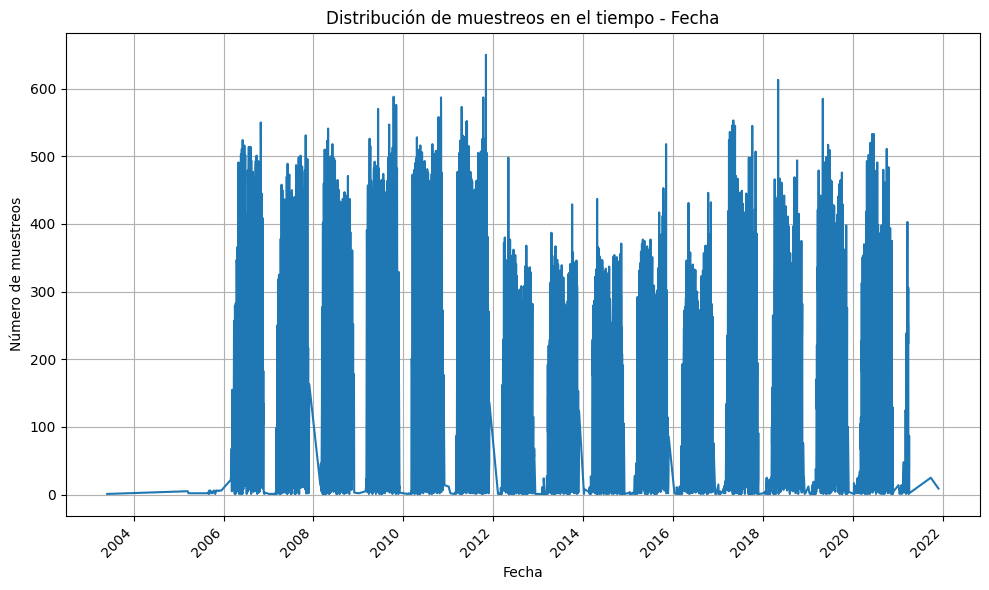

In [9]:
fecha_count = df_muestreos_parcela.groupby(df_muestreos_parcela['fecha']).size()
plt.figure(figsize=(10, 6))
fecha_count.plot(kind='line')

plt.title('Distribución de muestreos en el tiempo - Fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de muestreos')
plt.xticks(rotation=45)
plt.grid(True)  

plt.tight_layout()
plt.show()

Parece que la variable 'fecha' almacena mucha más información que 'generated_muestreos' de cara a la distribución en el tiempo de los datos. A su vez, se observa una clara estacionalidad posiblemente debido a los ciclos de maduración de las olivas. Sin embargo, vamos a hacer zoom a un año concreto para ver cómo funciona esta estacionalidad y si es igual para todos los años.

A su vez, parece que no todas las parcelas estan presentes en todos los años ya que en la distribución anual vemos un aumento en las instancias 2006-2012 y luego otra vez de 2017 a 2020. Vamos ver después en cuantas parcelas tenemos instancias de todos los años.

### Años relevantes

In [10]:
def plot_muestreos_por_year(df, year):
    df_filtrado = df[df['fecha'].dt.year == year]
    
    # Agrupa por fecha y cuenta los muestreos
    fecha_count = df_filtrado.groupby(df_filtrado['fecha'].dt.date).size()
    
    # Configura y muestra el gráfico
    plt.figure(figsize=(9, 4))
    fecha_count.plot(kind='line')
    plt.title(f'Distribución de muestreos en el tiempo para el año {year}')
    plt.xlabel('Fecha')
    plt.ylabel('Número de muestreos')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

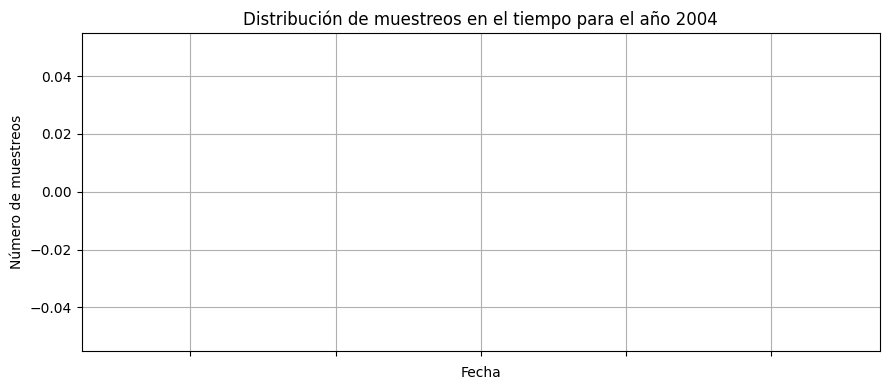

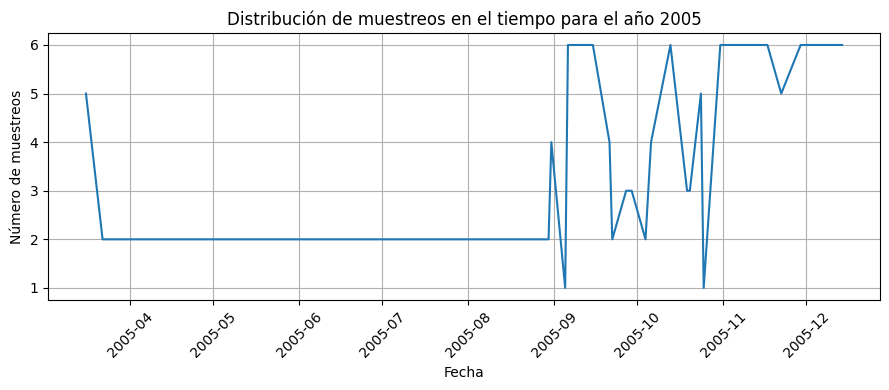

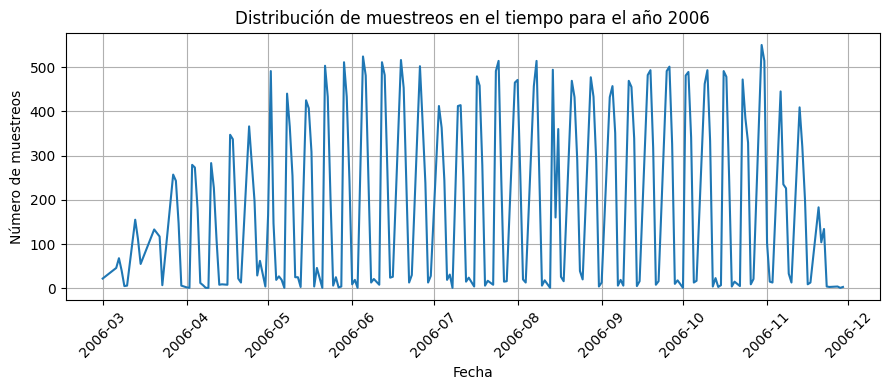

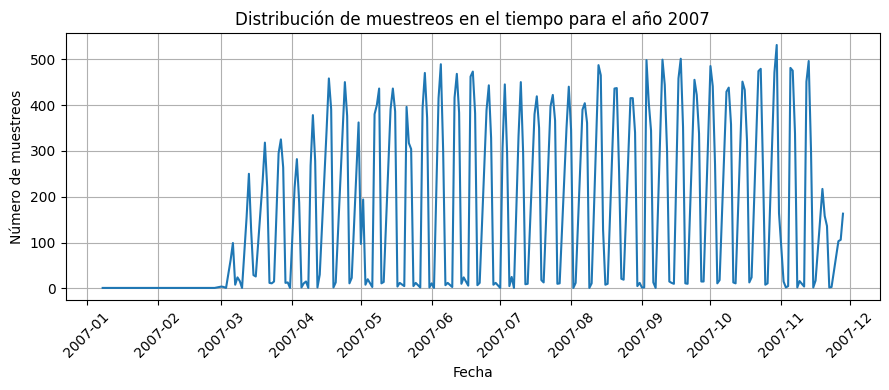

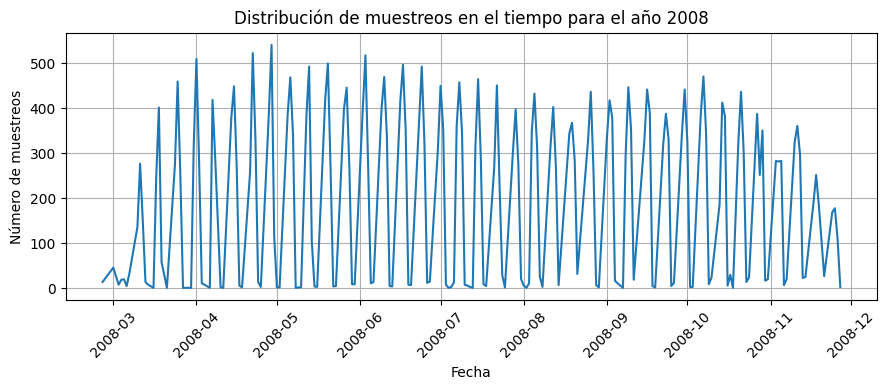

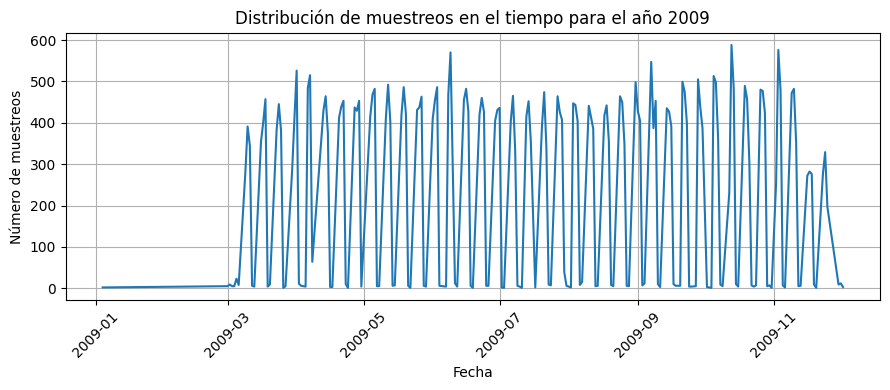

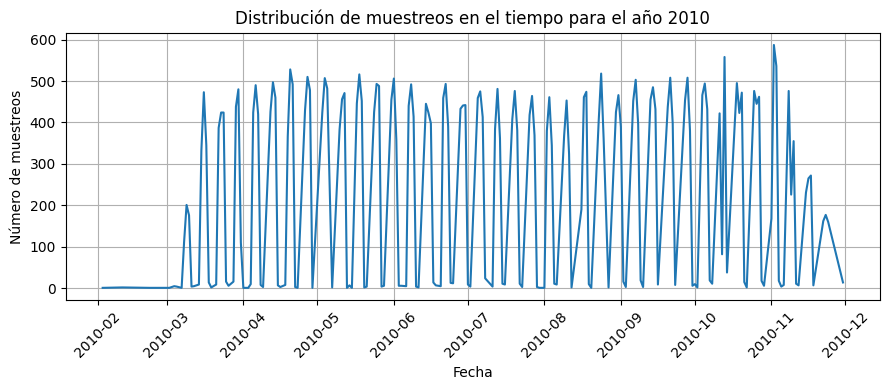

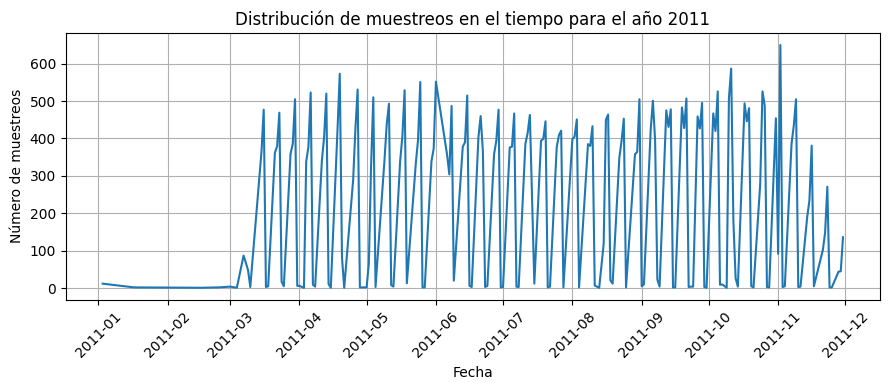

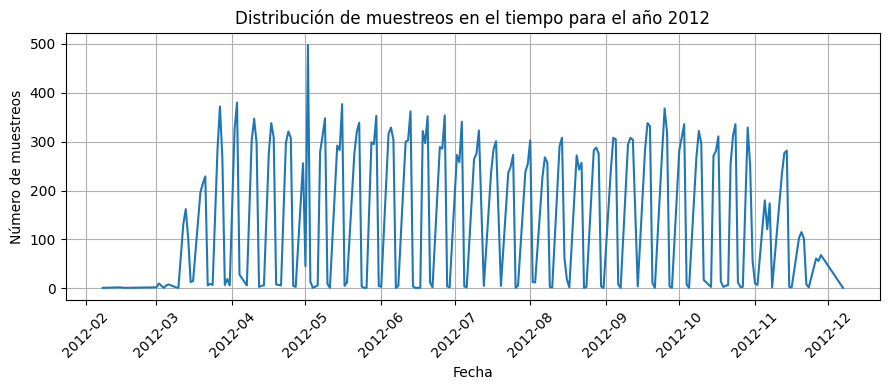

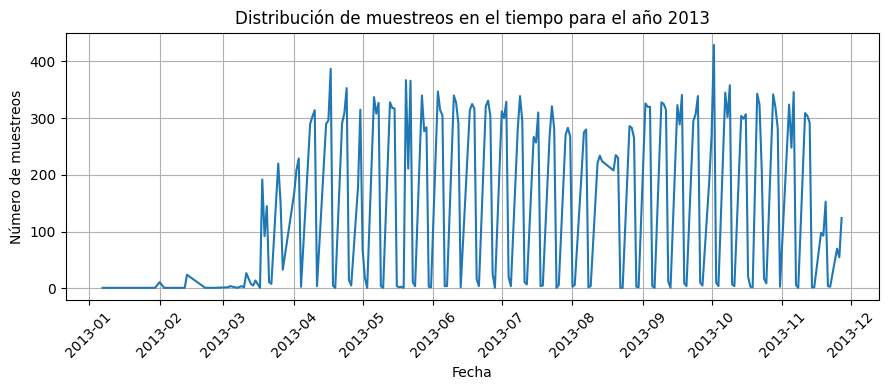

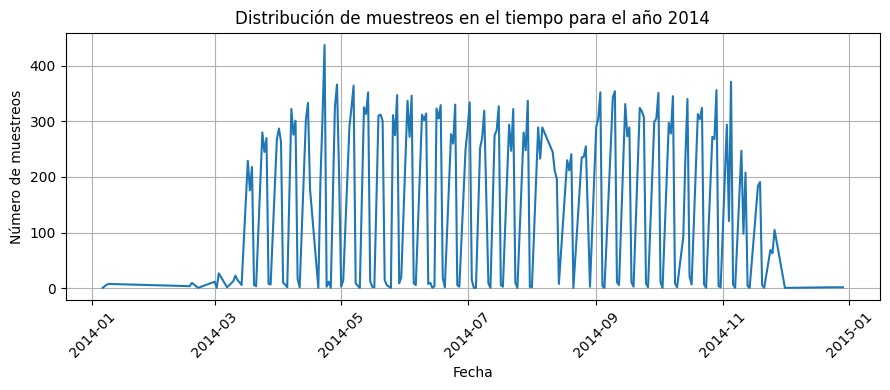

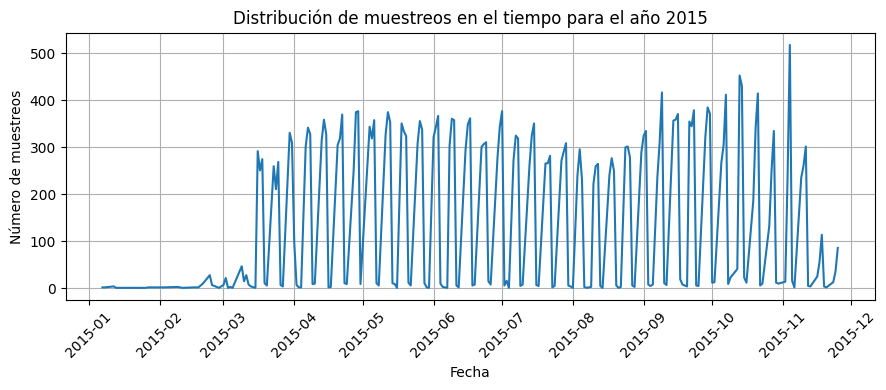

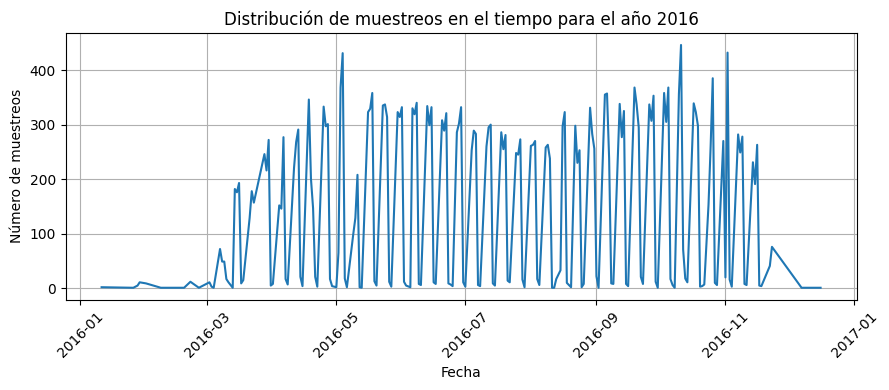

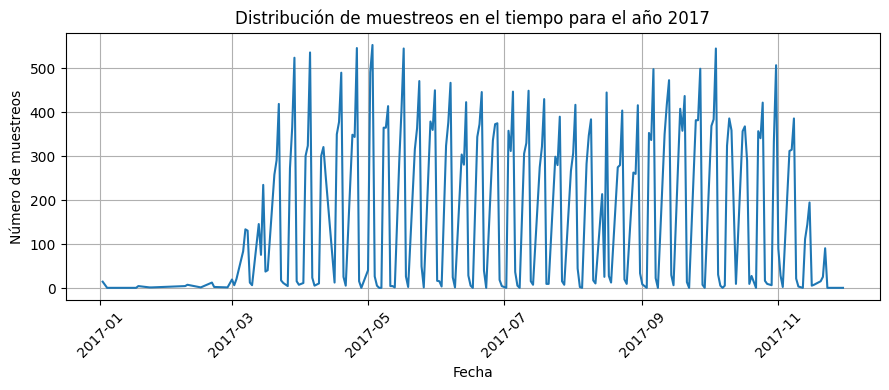

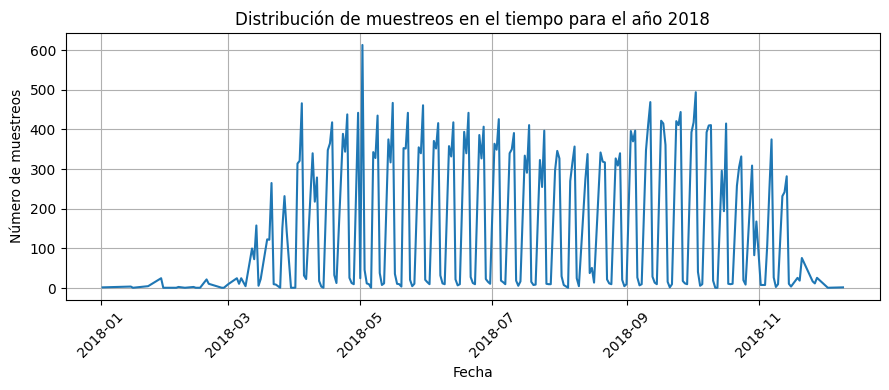

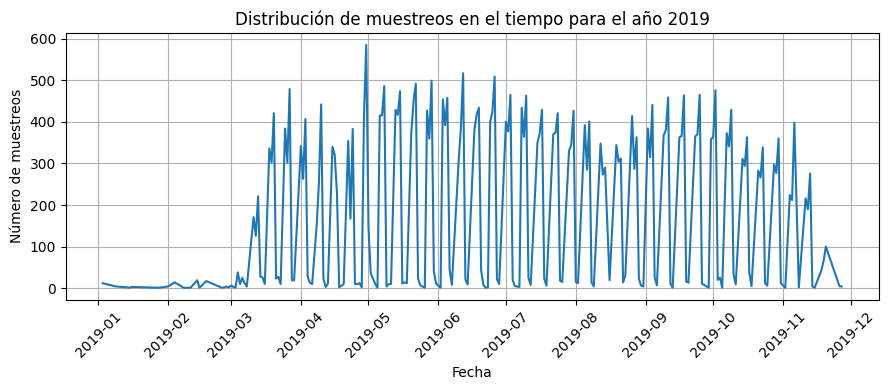

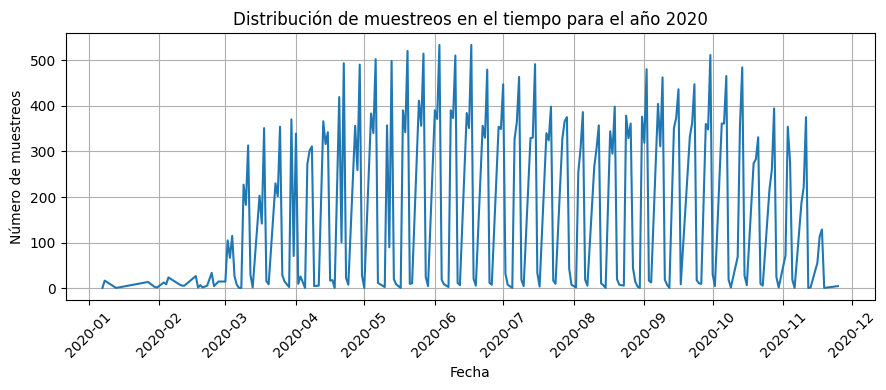

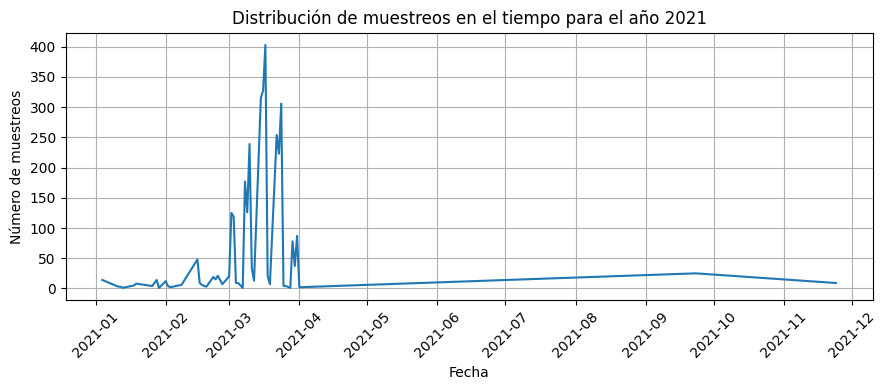

In [11]:
for year in range(2004, 2022): 
    plot_muestreos_por_year(df_muestreos_parcela, year)

Parece que la cosecha va de Marzo a Noviembre aproximandamente. A su vez, observamos que laa instancias de los años de 2005 y 2021 no están completas por lo que las eliminaremos de nuestro dataset.

In [12]:
df_muestreos_parcela = df_muestreos_parcela[~df_muestreos_parcela['fecha'].dt.year.isin([2003, 2004, 2005, 2021])]

### Parcelas relevantes

In [25]:
parcelas_por_año = df_filtrado.groupby('codparcela', observed=True)['year'].nunique()
parcelas_por_año = df_filtrado.groupby('codparcela', observed=True)['year'].nunique()
print(f"Número de parcelas presentes en todos los años de 2006 a 2020: {len(parcelas_por_año[parcelas_por_año == 15])}")
print(f"Número total de parcelas únicas en el dataset: {df_muestreos_parcela['codparcela'].nunique()}")

Número de parcelas presentes en todos los años de 2006 a 2020: 42
Número total de parcelas únicas en el dataset: 5070


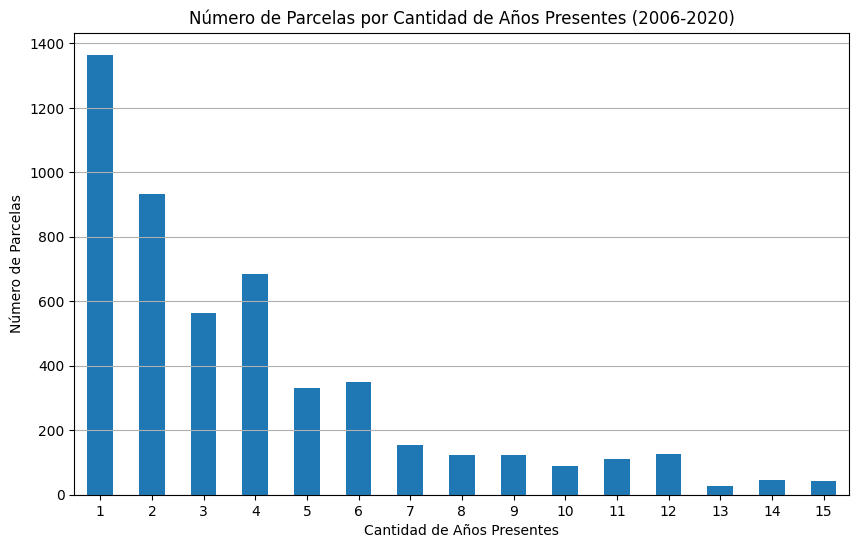

In [26]:
conteo_parcelas_por_años_presentes = parcelas_por_año.value_counts().sort_index(ascending=True)

plt.figure(figsize=(10, 6))
conteo_parcelas_por_años_presentes.plot(kind='bar')
plt.title('Número de Parcelas por Cantidad de Años Presentes (2006-2020)')
plt.xlabel('Cantidad de Años Presentes')
plt.ylabel('Número de Parcelas')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [27]:
def plot_parcelas_unicas_por_grupo_años(n):
    parcelas_grupo_n_años = df_muestreos_parcela[df_muestreos_parcela['codparcela'].isin(parcelas_por_año[parcelas_por_año == n].index)]
    
    parcelas_unicas_por_año = parcelas_grupo_n_años.groupby('year')['codparcela'].nunique()
    
    parcelas_unicas_por_año_filtrado = parcelas_unicas_por_año[parcelas_unicas_por_año.index.isin(range(2006, 2021))]
    
    # Creando el plot
    plt.figure(figsize=(9, 4))
    parcelas_unicas_por_año_filtrado.plot(kind='bar')
    plt.title(f'Número de Parcelas Únicas Presentes en Exactamente {n} Año(s) (2006-2020)')
    plt.xlabel('Año')
    plt.ylabel('Número de Parcelas Únicas')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

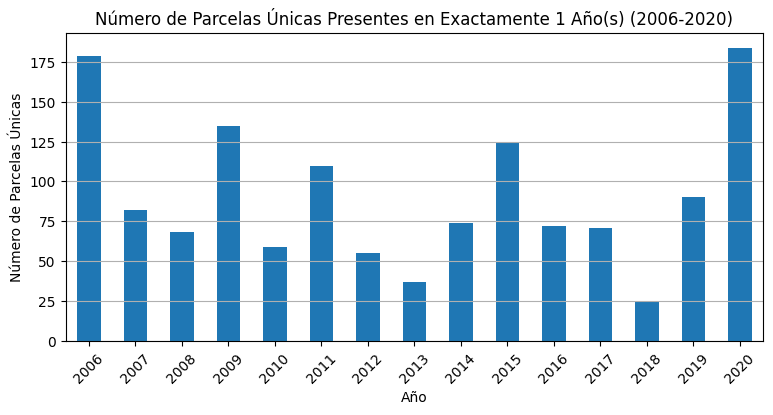

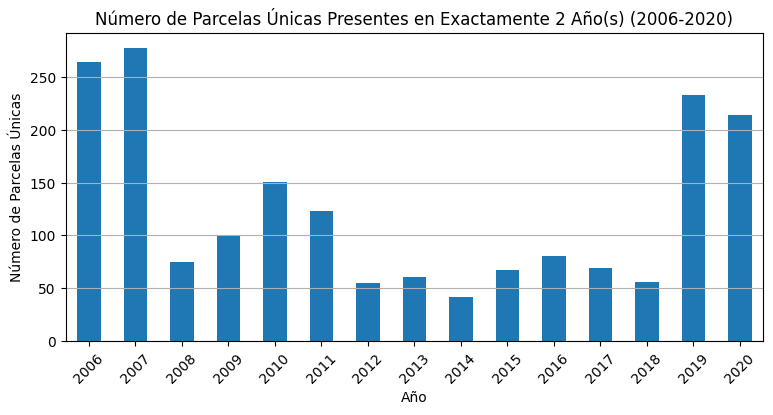

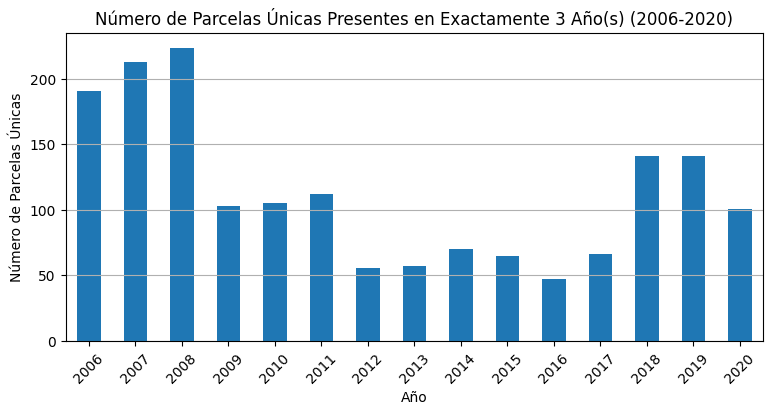

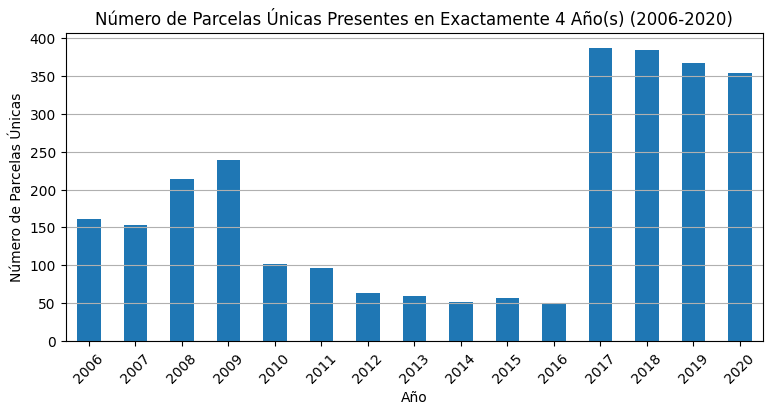

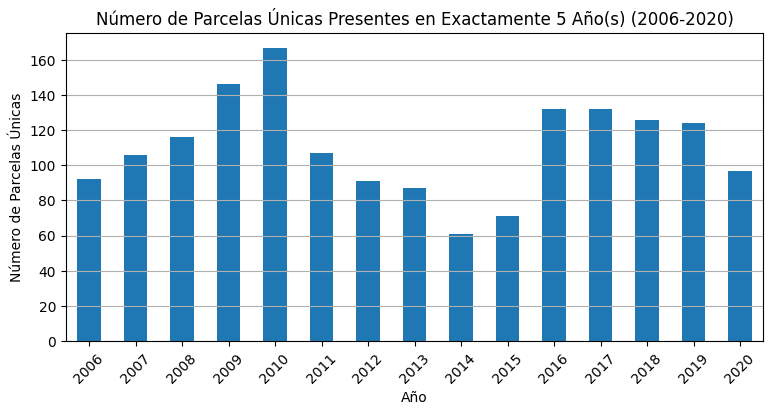

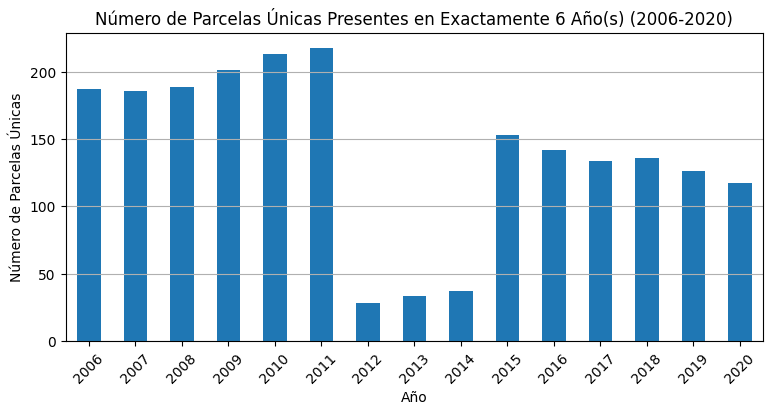

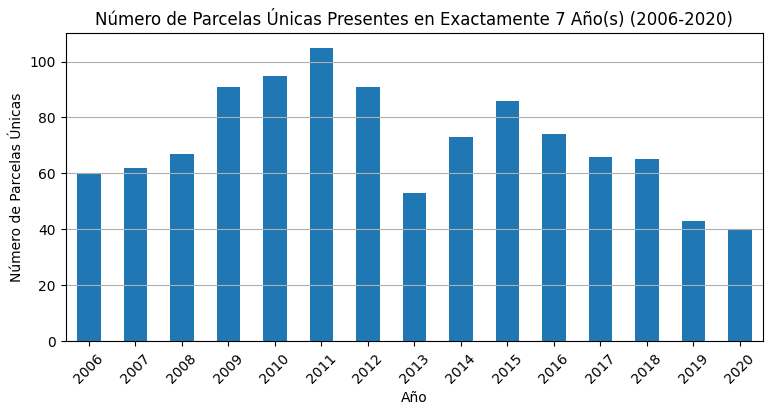

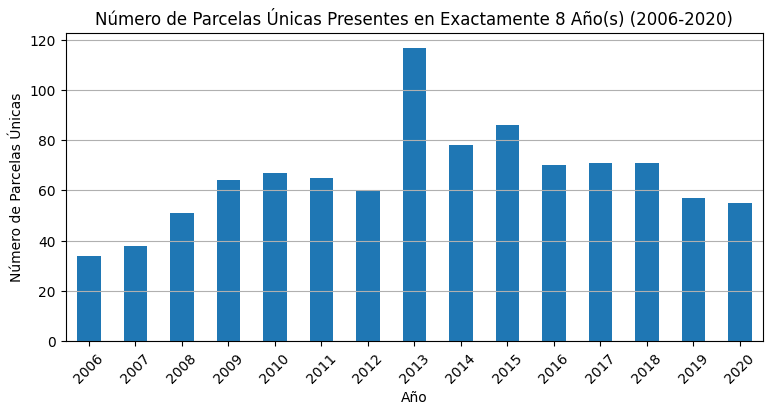

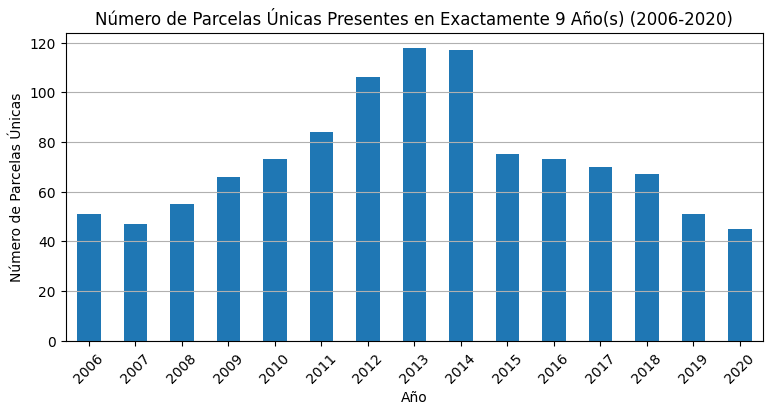

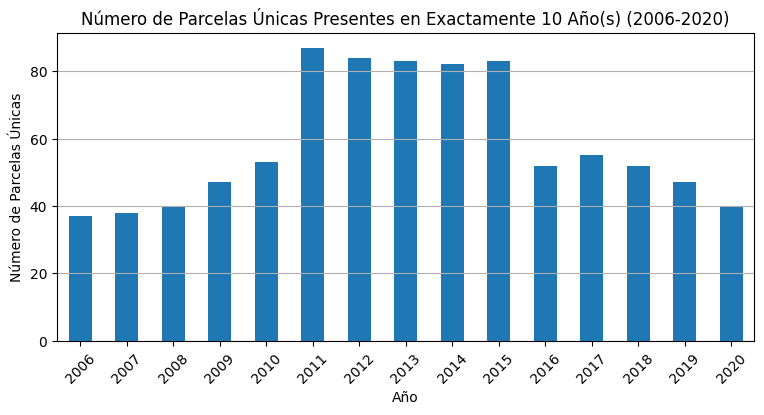

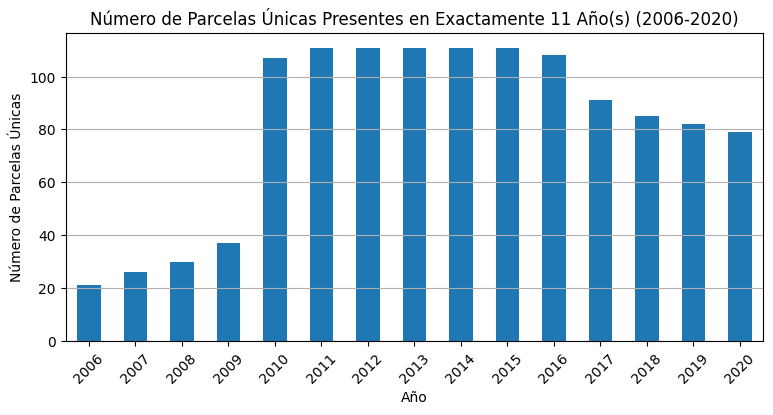

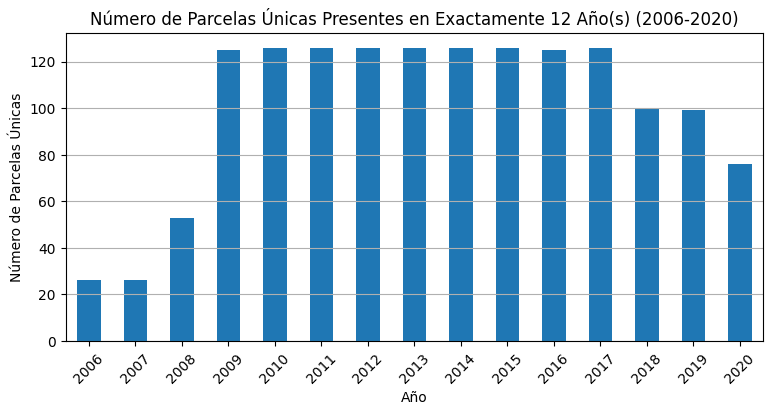

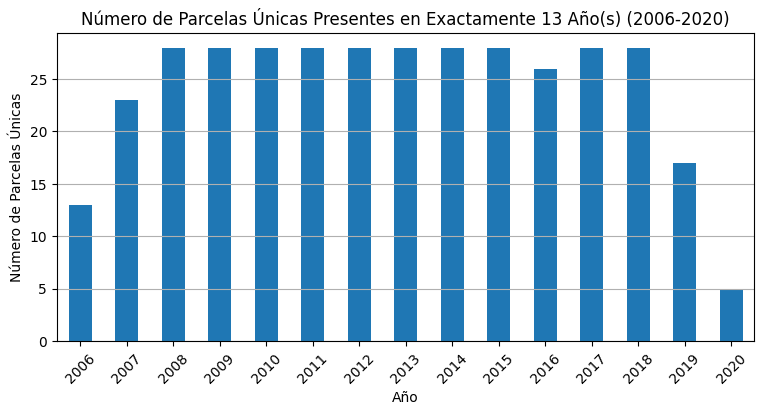

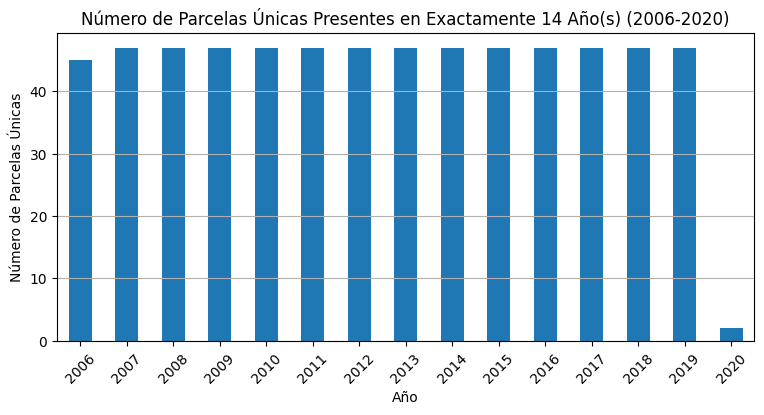

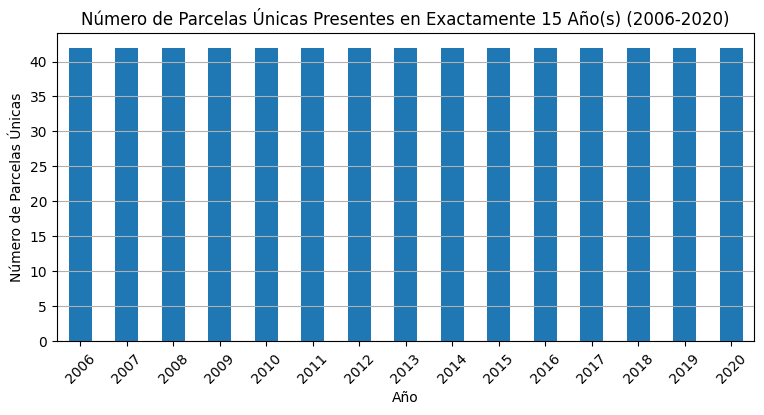

In [28]:
for n in range(1, 16):
    plot_parcelas_unicas_por_grupo_años(n)

Insights: A medida que vamos observando como se distribuye cada número de parcelas únicas observamos como la base de datos fue añadiendo datos de manera discontinua, haciendo especial incapie al comienzo (2006) y al final (2020) de la  creación de esta base de datos. 


*Duda a negocio* >> Para este producto es de especial relevancia que todas las parcelas tengan un histórico de datos aunque en algunas no sea tan completo como en otras. Sin embargo, ¿Es relevante una parcela de la cual solamente tenemos el histórico de 2006? En muchos atributos de dataset si ya que estos son no cambian pero en aquellos relacioandos con el estado fenológico quizás sea mas complicado.

## Estado fenológico

In [29]:
columnas_estado_fenologico = [f'estado_fenologico_{i}' for i in range(1, 15)]

df_muestreos_parcela['conteo_1'] = df_muestreos_parcela[columnas_estado_fenologico].apply(lambda x: (x == 1).sum(), axis=1)
df_muestreos_parcela['conteo_2'] = df_muestreos_parcela[columnas_estado_fenologico].apply(lambda x: (x == 2).sum(), axis=1)

instancias_incorrectas = df_muestreos_parcela[(df_muestreos_parcela['conteo_1'] != 1) | (df_muestreos_parcela['conteo_2'] != 1)]

numero_total_instancias = len(df_muestreos_parcela)
numero_instancias_incorrectas = len(instancias_incorrectas)
porcentaje_incorrectas = (numero_instancias_incorrectas / numero_total_instancias) * 100

print(f"Número total de instancias: {numero_total_instancias}")
print(f"Número de instancias incorrectas: {numero_instancias_incorrectas}")
print(f"Porcentaje de instancias incorrectas sobre el total: {porcentaje_incorrectas:.2f}%")

/var/folders/p2/qz8vn45j0y7bvrtnwplk9gjm0000gn/T/ipykernel_61489/2019096045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muestreos_parcela['conteo_1'] = df_muestreos_parcela[columnas_estado_fenologico].apply(lambda x: (x == 1).sum(), axis=1)
/var/folders/p2/qz8vn45j0y7bvrtnwplk9gjm0000gn/T/ipykernel_61489/2019096045.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muestreos_parcela['conteo_2'] = df_muestreos_parcela[columnas_estado_fenologico].apply(lambda x: (x == 2).sum(), axis=1)


Número total de instancias: 578472
Número de instancias incorrectas: 360293
Porcentaje de instancias incorrectas sobre el total: 62.28%


In [30]:
columnas_a_visualizar = ['fecha'] + columnas_estado_fenologico

df_estados = df_muestreos_parcela[columnas_a_visualizar]
df_estados

,fecha,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14
0,2006-04-16,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-04-27,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-05-04,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-05-11,NaN,NaN,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-05-17,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581783,2020-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN
581784,2020-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
581785,2020-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN
581786,2020-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN


El número de estados fenológicos incorrectos bajo el criterio establecido es demasiado elevado como para eliminar las instancias. A simple vista en el dataset parece que una oliva puede mostar varios estados fenológicos 1, lo cual puede tener sentido ya que no siempre es tan intuitivo añadir este estado. 

Repetiremos el filtrado centrándonos solamente en los estados fenológicos 2.

In [31]:
instancias_incorrectas_2 = df_muestreos_parcela[(df_muestreos_parcela['conteo_2'] != 1)]

numero_total_instancias = len(df_muestreos_parcela)
numero_instancias_incorrectas = len(instancias_incorrectas_2)
porcentaje_incorrectas = (numero_instancias_incorrectas / numero_total_instancias) * 100

print(f"Número total de instancias: {numero_total_instancias}")
print(f"Número de instancias incorrectas: {numero_instancias_incorrectas}")
print(f"Porcentaje de instancias incorrectas sobre el total: {porcentaje_incorrectas:.2f}%")

Número total de instancias: 578472
Número de instancias incorrectas: 14360
Porcentaje de instancias incorrectas sobre el total: 2.48%


In [32]:
instancias_incorrectas_2_cero = len(df_muestreos_parcela[(df_muestreos_parcela['conteo_2'] == 0)])
instancias_incorrectas_2_dos = len(df_muestreos_parcela[(df_muestreos_parcela['conteo_2'] > 1)])

print(f"Número de instancias igual a cero: {instancias_incorrectas_2_cero}")
print(f"Número de instancias con más de un 2: {instancias_incorrectas_2_dos}")

Número de instancias igual a cero: 14355
Número de instancias con más de un 2: 5


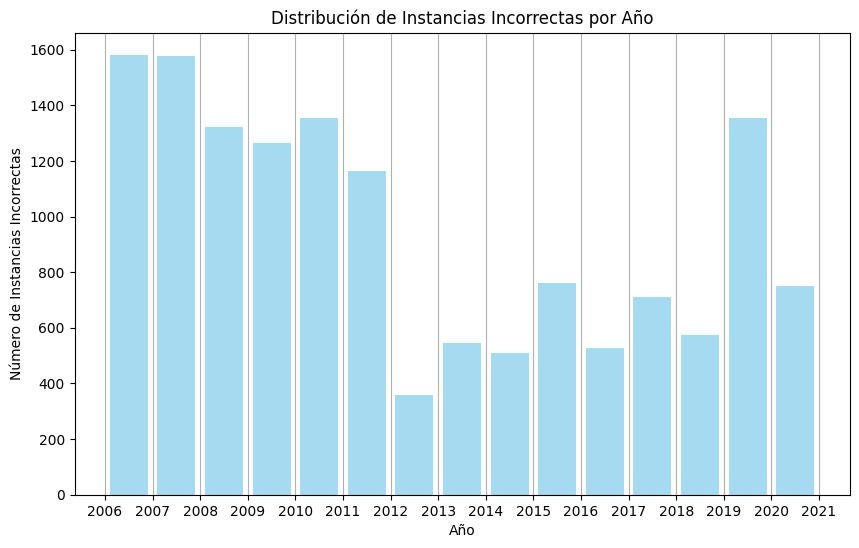

In [33]:
plt.figure(figsize=(10, 6))
instancias_incorrectas_2['fecha'].dt.year.hist(bins=range(2006, 2022), rwidth=0.8, alpha=0.75, color='skyblue')

plt.title('Distribución de Instancias Incorrectas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Instancias Incorrectas')
plt.xticks(range(2006, 2022))
plt.grid(axis='y')

plt.show()

Mi hipóteiss inicial es que gran parte de estas instancias incorrectas podrían estar al final del último año debido que ese ciclo no se completase o algo similar. Sin embargo, están distribuidas a lo largo de los años.

Supongo que esto puede deberse o a que esas parcelas dejasen de estar cultivadas o a que en el momento de la instancia no hubbiera un estado fenológico predominante claro.

Procederemos a eliminar estas instancias incorrectas de nuestro dataset ya que no contienen información de la variable objetivo.

In [34]:
df_muestreos_parcela = df_muestreos_parcela.drop(instancias_incorrectas_2.index)
df_muestreos_parcela

,generated_muestreos,codparcela,provincia,municipio,fecha,campaña,poligono,parcela,recinto,subrecinto,...,316_fecha_de_plantación_variedad_secundaria,315_patrón_variedad_secundaria,317_%_superficie_ocupada_variedad_secundaria,306_altura_de_copa_(m),310_patrón_variedad_principal,411_representa_a_la_u_h_c_(si/no),109_sistema_para_el_cumplimiento_gestión_integrada,year,conteo_1,conteo_2
0,2020-04-23 14:30:39,023-00109-00-00,almeria,abla,2006-04-16,2006,23,109,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,2,1
1,2020-04-23 14:30:39,023-00109-00-00,almeria,abla,2006-04-27,2006,23,109,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,1,1
2,2020-04-23 14:30:39,023-00109-00-00,almeria,abla,2006-05-04,2006,23,109,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,2,1
3,2020-04-23 14:30:39,023-00109-00-00,almeria,abla,2006-05-11,2006,23,109,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,3,1
4,2020-04-23 14:30:39,023-00109-00-00,almeria,abla,2006-05-17,2006,23,109,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581783,2021-04-05 17:26:06,008-00013-01-2,sevilla,villanueva de san juan,2020-10-06,2020,8,13,1,2,...,NaN,NaN,NaN,NaN,NaN,SI,Producción Integrada (PI),2020,1,1
581784,2021-04-05 17:26:06,008-00013-01-2,sevilla,villanueva de san juan,2020-10-14,2020,8,13,1,2,...,NaN,NaN,NaN,NaN,NaN,SI,Producción Integrada (PI),2020,0,1
581785,2021-04-05 17:26:06,008-00013-01-2,sevilla,villanueva de san juan,2020-10-20,2020,8,13,1,2,...,NaN,NaN,NaN,NaN,NaN,SI,Producción Integrada (PI),2020,1,1
581786,2021-04-05 17:26:06,008-00013-01-2,sevilla,villanueva de san juan,2020-11-03,2020,8,13,1,2,...,NaN,NaN,NaN,NaN,NaN,SI,Producción Integrada (PI),2020,1,1


## Feature Importance

Hay demasiadas columnas en nuestros dataset que podrían añadir ruido al modelo, vamos a tratar de hacer una primera limpieza bajo el criterio de la cantidad de valores nulos en cada instancia.

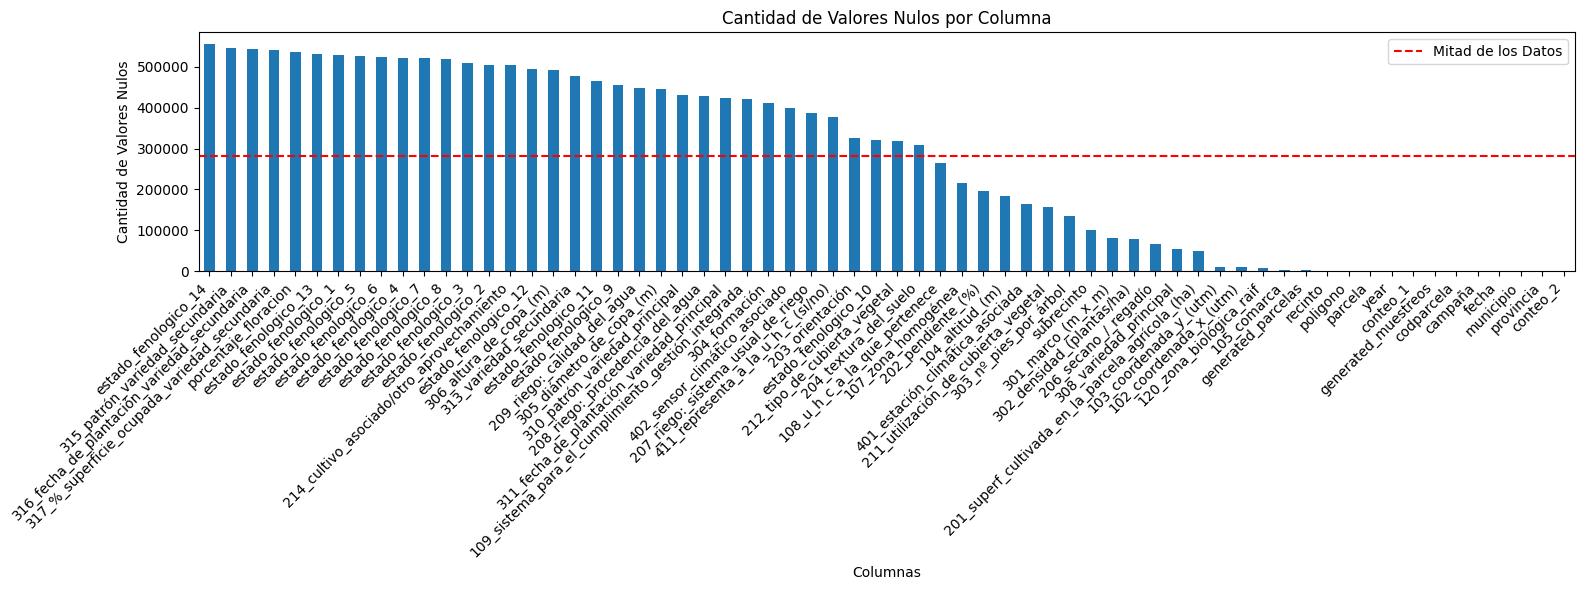

In [44]:
nulos_por_columna = df_muestreos_parcela.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
nulos_por_columna.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')

plt.axhline(y=df_muestreos_parcela.shape[0] / 2, color='r', linestyle='--', label='Mitad de los Datos')

plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
df_muestreos_parcela = df_muestreos_parcela.drop(columns=['generated_muestreos'])

columnas = ['fecha'] + [col for col in df_muestreos_parcela.columns if col != 'fecha']
df_muestreos_parcela = df_muestreos_parcela[columnas]

In [49]:
columnas_estado_fenologico = [f'estado_fenologico_{i}' for i in range(1, 15)]

umbral = len(df_muestreos_parcela) / 2

columnas_a_eliminar = df_muestreos_parcela.drop(columns=columnas_estado_fenologico).isnull().sum()
columnas_a_eliminar = columnas_a_eliminar[columnas_a_eliminar > umbral].index

df_muestreos_parcela_limpio = df_muestreos_parcela.drop(columns=columnas_a_eliminar)
df_muestreos_parcela_limpio.head(4)

,fecha,codparcela,provincia,municipio,campaña,poligono,parcela,recinto,subrecinto,estado_fenologico_1,...,302_densidad_(plantas/ha),303_nº_pies_por_árbol,308_variedad_principal,107_zona_homogénea,120_zona_biológica_raif,401_estación_climática_asociada,108_u_h_c_a_la_que_pertenece,year,conteo_1,conteo_2
0,2006-04-16,023-00109-00-00,almeria,abla,2006,23,109,0,0,1.0,...,400.0,NaN,LECHIN,AL/OL/02,AL/OL/02 NACIMIENTO - ALTO ANDARAX,AL006,NaN,2006,2,1
1,2006-04-27,023-00109-00-00,almeria,abla,2006,23,109,0,0,NaN,...,400.0,NaN,LECHIN,AL/OL/02,AL/OL/02 NACIMIENTO - ALTO ANDARAX,AL006,NaN,2006,1,1
2,2006-05-04,023-00109-00-00,almeria,abla,2006,23,109,0,0,NaN,...,400.0,NaN,LECHIN,AL/OL/02,AL/OL/02 NACIMIENTO - ALTO ANDARAX,AL006,NaN,2006,2,1
3,2006-05-11,023-00109-00-00,almeria,abla,2006,23,109,0,0,NaN,...,400.0,NaN,LECHIN,AL/OL/02,AL/OL/02 NACIMIENTO - ALTO ANDARAX,AL006,NaN,2006,3,1


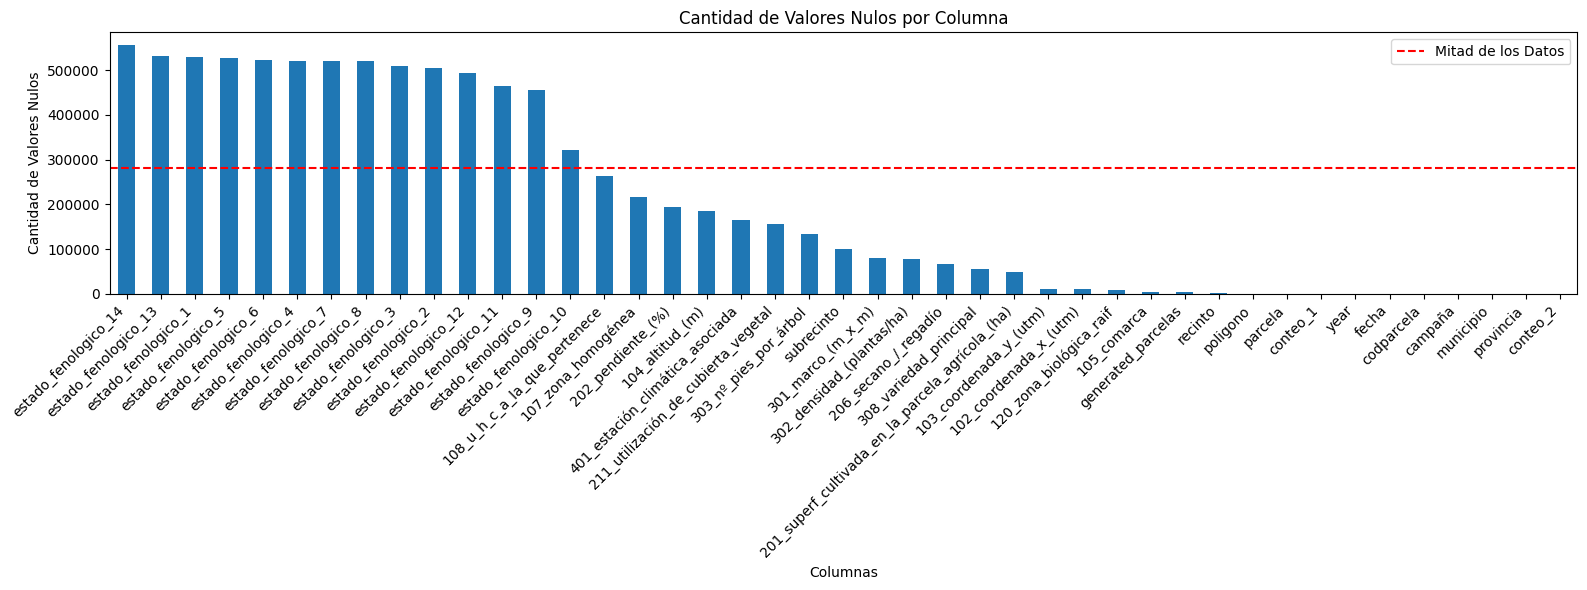

In [47]:
nulos_por_columna_2 = df_muestreos_parcela_limpio.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
nulos_por_columna_2.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')

plt.axhline(y=df_muestreos_parcela_limpio.shape[0] / 2, color='r', linestyle='--', label='Mitad de los Datos')

plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Variable Objetivo

Tenemos que definir nuestra variabke objetivo, estados avanzados en dos semanas.